<a href="https://colab.research.google.com/github/hugocfrias/MVP-Machine-Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Machine Learning**

**Título:** Modelo Supervisionado- Base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

**Linkedin:** https://www.linkedin.com/in/hugo-frias-7059b622/

**E-mail:** hugofrias2@hotmail.com

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://github.com/hugocfrias/MVP-Machine-Learning/blob/main/Mental_Health_Lifestyle_Dataset_CSV.csv


# 1. Descrição do Problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar 'níveis de stress e bem-estar' de acordo com hábitos do cotidiano.


## 1.1. Hipóteses do Problema

Hipóteses levantadas:

1. Podemos segregar os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?

2. Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?

3. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?

4. Premissas: De maneira empírica, pela natureza dos atributos do dataset original, creio que há uma correlação entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).


## 1.2. Tipo de Problema

O problema foi identificado como do tipo de **classificação supervisionada**. De acordo com os atributos numéricos (horas de sono, horas trabalhadas, idade, score de felididade etc), o objetivo é a previsão dos '**níveis de stress**' e  bem-estar' dos indivíduos.

## 1.3. Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## 1.4. Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000 instâncias, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---



# 2. Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados. Também demonstra o carregamento do dataset **'Mental Health Lifestyle'**.


*Observações Iniciais Importações e Carga de Dados*


---


<<EDITAR!!!>> Além da importação das bibliotecas pandas, numpy, matplotlib e seaborn, realizei  importação das paletas de cores 'viridis' e 'inferno'. O objetivo é uma melhor visualização dos gráficos que virão a seguir.


---


In [30]:
# Tratamento de warnings
import warnings
warnings.filterwarnings("ignore")

# Imports de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

# importação dos dados uma url para um dataframe

url_dados = 'https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv'

# Carga do dataset através da url
Mental_Health_Lifestyle = pd.read_csv(url_dados)

In [31]:
# Exibição as primeiras linhas
Mental_Health_Lifestyle.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


>**Com o objetivo de facilitar as próximas análises, realizei uma reordenação dos atributos. Nesse caso, iniciando o dataframe (df) com os atributos categóricos e, posteriormente, os atributos núméricos**


In [32]:
# Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score', 'Stress Level' ]
df = Mental_Health_Lifestyle[new_order]

In [33]:
# Exibição as primeiras linhas do df reordenado
df.head()

,Country,Gender,Exercise Level,Diet Type,Mental Health Condition,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
0,Brazil,Male,Low,Vegetarian,NaN,48,6.3,21,4.0,7.8,6.5,Low
1,Australia,Male,Moderate,Vegan,PTSD,31,4.9,48,5.2,8.2,6.8,Low
2,Japan,Female,Low,Vegetarian,NaN,37,7.2,43,4.7,9.6,9.7,High
3,Brazil,Male,Low,Vegan,Depression,35,7.2,43,2.2,8.2,6.6,Low
4,Germany,Male,Low,Balanced,Anxiety,46,7.3,35,3.6,4.7,4.4,Low


# 3. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### *3.1. Tratamento de Nulos*

A limpeza consiste na verificação da consistência das informações, correção de possíveis erros de preenchimento ou eliminação de valores desconhecidos, redundantes ou não pertencentes ao domínio.

>**No dataframe 'df', podemos ver abaixo que há 595 instâncias com valores nulos no atributo 'Mental Health Condition'. Analisando o dataset original, as 595 linhas nulas estão com o status de 'None'. Por ser tratar de um estado de desordem mental (Mental Health Condition), tive a dúvida se realmente são informações faltantes ou simplesmente instâncias nas quais o respondente não
possuía algum tipo de desordem mental.**

>**Com a impossibilidade de pesquisar essa dúvida, optei por exluir do dataframe o atributo 'Mental Health Condition'.**

>**Dessa forma, foi criado o dataframe 'df_cleaned'.**

In [34]:
# Verificar a presença de valores nulos no dataset df
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Mental Health Condition,595
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0


In [35]:
# Criação do novo DataFrame com a limpeza dos dados (exclusão coluna 'Mental Health Condition')
df_cleaned = df.dropna(axis=1, how='any')

As demonstrações do datraframe após a limpeza podem ser vistas nos código que exibem as primeiras do dataframe 'df_cleaned';

In [36]:
# Exibição das primeiras linhas df_cleaned
df_cleaned.head()

,Country,Gender,Exercise Level,Diet Type,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Stress Level
0,Brazil,Male,Low,Vegetarian,48,6.3,21,4.0,7.8,6.5,Low
1,Australia,Male,Moderate,Vegan,31,4.9,48,5.2,8.2,6.8,Low
2,Japan,Female,Low,Vegetarian,37,7.2,43,4.7,9.6,9.7,High
3,Brazil,Male,Low,Vegan,35,7.2,43,2.2,8.2,6.6,Low
4,Germany,Male,Low,Balanced,46,7.3,35,3.6,4.7,4.4,Low


Abaixo verificamos que não há mais a presença de nulos no dataframde 'df_cleaned'

In [37]:
# Verificação da presença de valores nulos no dataset df_cleaned
print("Valores nulos no dataset Iris:")
df_cleaned.isnull().sum()

Valores nulos no dataset Iris:


,0
Country,0
Gender,0
Exercise Level,0
Diet Type,0
Age,0
Sleep Hours,0
Work Hours per Week,0
Screen Time per Day (Hours),0
Social Interaction Score,0
Happiness Score,0


*Comentários Tratamento de Nulos:*:


---


> Como citado anteriormente, optei pela remoção do atributo categórico 'Mental Health Condition' pela presença de linhas 'None';

> Após a limpeza foi criado o dataframe 'df_cleaned';

---


### *3.2. Separação Treino e Teste*

>**Com o objetivo de trabalhar os dados para futuras análises (outros módulos do curso), os dados foram separações entre treino (80% das instâncias) e teste (20% as instâncias)**

In [40]:
# Separação em bases de treino e teste (holdout)
array = df_cleaned.values
X = array[:,4:10] # atributos
y = array[:,10] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [42]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2400, 6)
Dimensões de X_test: (600, 6)
Dimensões de y_train: (2400,)
Dimensões de y_test: (600,)


KNN: 0.335833 (0.027080)
CART: 0.330000 (0.029333)
NB: 0.314583 (0.026890)
SVM: 0.325000 (0.027449)


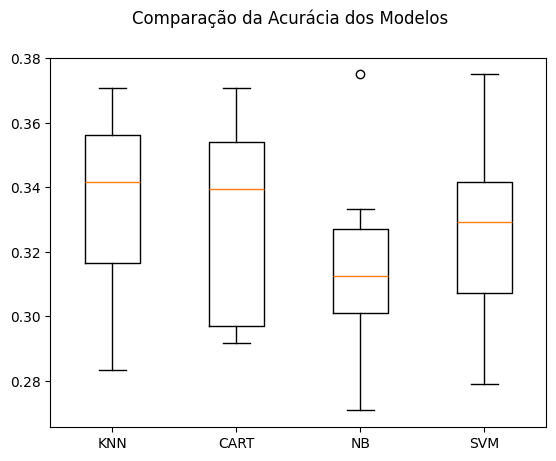

In [47]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.335
